In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip /content/drive/MyDrive/final_dataset_teacher.zip

In [ ]:
# Importing libraries and modules
import numpy as np
import pandas as pd
import scipy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cut_tree, set_link_color_palette, dendrogram
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import f1_score

In [ ]:
# Reading the first dataset and dropping irrelevant columns
df2 = pd.read_csv("final_complete_teacher_dataset.csv")
df1 = df2.drop(df2.columns[[0, 1, 2, 13, 14]], axis=1)

X1 = df2[['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10']].to_numpy()
for j in range(len(X1)):
  for i in range(len(X1[0])):
    if i == 0 or i == 5 or i == 7:
      X1[j][i] *= 4
    elif i == 1 or i == 6:
      X1[j][i] *= 2
    elif i == 2:
      X1[j][i] *= 1
    elif i == 3 or i == 4 or i == 9:
      X1[j][i] *= 5
    else:
      X1[j][i] *= 3

In [ ]:
# Reading the second dataset and dropping irrelevant columns
d = pd.read_csv("final_dataset_teacher.csv")
df = d.drop(d.columns[[0, 1, 12, 13]], axis=1)

X = df[['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10']].to_numpy()
for j in range(len(X)):
  for i in range(len(X[0])):
    if i == 0 or i == 5 or i == 7:
      X[j][i] *= 4
    elif i == 1 or i == 6:
      X[j][i] *= 2
    elif i == 2:
      X[j][i] *= 1
    elif i == 3 or i == 4 or i == 9:
      X[j][i] *= 5
    else:
      X[j][i] *= 3

In [ ]:
# Calculate distances between teachers based on average performance
distances = pdist(X)
distances1 = pdist(X1)

In [ ]:
# Perform single-link hierarchical clustering
Z = linkage(distances, method="ward")
Z1 = linkage(distances1, method="ward")

In [ ]:
# Cut the tree at threshold to obtain 3 clusters
threshold = max(Z[:, 1]) * 0.7
T = cut_tree(Z, n_clusters=None, height=threshold)

In [ ]:
threshold1 = max(Z1[:, 1]) * 0.1
T1 = cut_tree(Z1, n_clusters=None, height=threshold1)

In [ ]:
def get_cat(num):
  if num < 3:
    return "Poor"
  elif num >=3 and num < 4:
    return "Mediocre"
  else:
    return "Excellent"

In [ ]:
# Assign categories based on cluster membership and performance
categories = [(T[i][0] + 1) for i in range(len(T))]
fin_cat = [(T[i][0]) for i in range(len(T))]
avgs = d["average"]
s1, s2, s3 = 0, 0, 0
c1, c2, c3 = 0, 0, 0
p = 0
for c in categories:
  if c == 1:
    s1 += avgs[p]
    c1 += 1
  elif c == 2:
    s2 += avgs[p]
    c2 += 1
  else:
    s3 += avgs[p]
    c3 += 1
  p += 1
avg1 = s1/c1
avg2 = s2/c2
avg3 = s3/c3
cat1 = get_cat(avg1)
cat2 = get_cat(avg2)
cat3 = get_cat(avg3)
for i in range(len(categories)):
  if categories[i] == 1:
    categories[i] = cat1
  elif categories[i] == 2:
    categories[i] = cat2
  else:
    categories[i] = cat3

In [ ]:
# Assign categories based on cluster membership and performance
categories1 = [(T1[i][0] + 1) for i in range(len(T1))]
fin_cat1 = [(T1[i][0]) for i in range(len(T1))]
avgs1 = df2["average"]
s1, s2, s3 = 0, 0, 0
c1, c2, c3 = 0, 0, 0
p = 0
for c in categories1:
  if c == 1:
    s1 += avgs1[p]
    c1 += 1
  elif c == 2:
    s2 += avgs1[p]
    c2 += 1
  else:
    s3 += avgs1[p]
    c3 += 1
  p += 1
avg1 = s1/c1
avg2 = s2/c2
avg3 = s3/c3
cat1 = get_cat(avg1)
cat2 = get_cat(avg2)
cat3 = get_cat(avg3)
for i in range(len(categories1)):
  if categories1[i] == 1:
    categories1[i] = cat1
  elif categories1[i] == 2:
    categories1[i] = cat2
  else:
    categories1[i] = cat3

In [ ]:
# Add new column with category to the original data
d["category"] = categories
df2["category"] = categories1

In [ ]:
# Print the results
print(d[["faculty_id", "category"]].to_string())

   faculty_id   category
0           A       Poor
1           B       Poor
2           C       Poor
3           D   Mediocre
4           E  Excellent
5           F   Mediocre
6           G  Excellent
7           H  Excellent
8           I   Mediocre
9           J  Excellent
10          K   Mediocre
11          L   Mediocre
12          M       Poor
13          N       Poor
14          O  Excellent


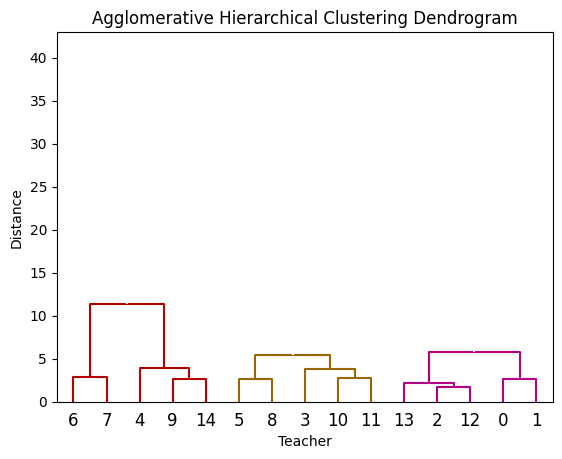

In [ ]:
# Create the dendrogram (replace `T` with your cluster assignments)
# Set the colour of the cluster here:
set_link_color_palette(['#b30000','#996600', '#b30086'])

# Make the dendrogram and give the colour above threshold
dendrogram(Z, color_threshold=12, above_threshold_color='white')

plt.xlabel("Teacher")
plt.ylabel("Distance")
plt.title("Agglomerative Hierarchical Clustering Dendrogram")

# Show the graph
plt.show()

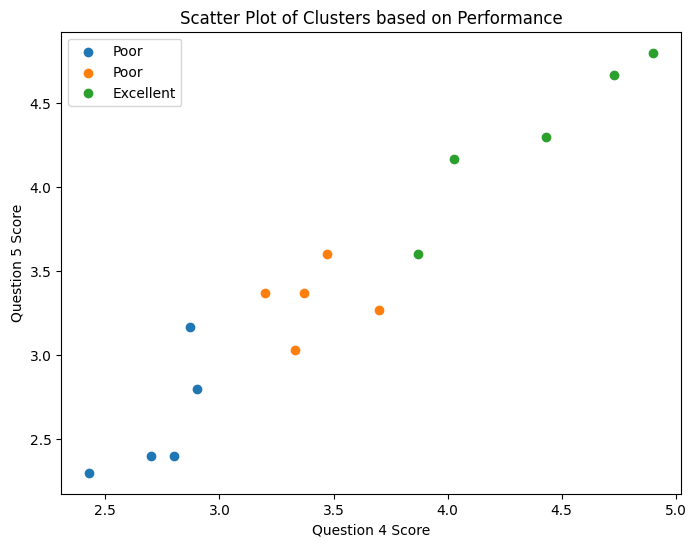

In [ ]:
# Create a scatter plot based on your data and cluster assignments
plt.figure(figsize=(8, 6))
for label in np.unique(T):
    indices = np.where(T == label)[0]
    if label == 0:
      ct = cat1
    elif label == 1:
      ct = cat2
    else:
      ct = cat3
    plt.scatter(df.loc[indices, "q1"], df.loc[indices, "q2"], label=ct)
plt.legend()
plt.xlabel("Question 4 Score")
plt.ylabel("Question 5 Score")
plt.title("Scatter Plot of Clusters based on Performance")
plt.show()

In [ ]:
ori_lab = df2['label'].to_numpy()
f_cat = np.array(fin_cat1)

In [ ]:
# Calculate F1-score
f1 = f1_score(ori_lab, f_cat, average='weighted')

In [ ]:
print(f"F1-score: {f1}")

F1-score: 0.6897041286715949
